In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch

In [103]:
wholesale_customer_data = pd.read_csv('./wholesale customers data.csv')
wholesale_customer_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Task 2.1

I perform exploratory analysis by visualizing the data.

<AxesSubplot:xlabel='Fresh'>

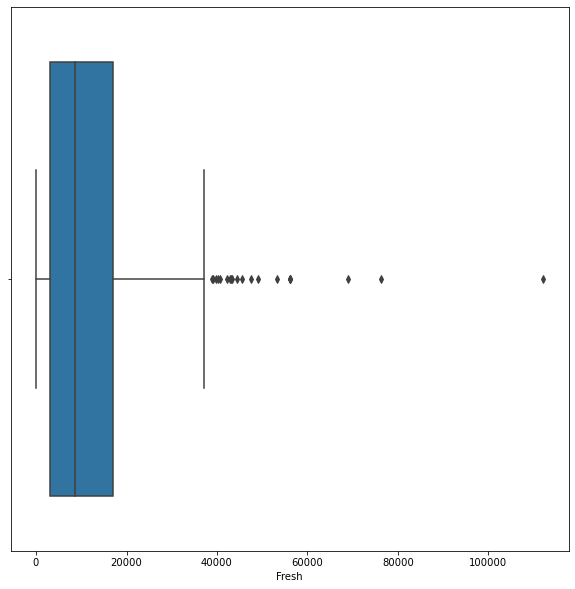

In [104]:
plt.figure(figsize=(10,10))
sns.boxplot(data=wholesale_customer_data, x='Fresh')

<AxesSubplot:xlabel='Milk'>

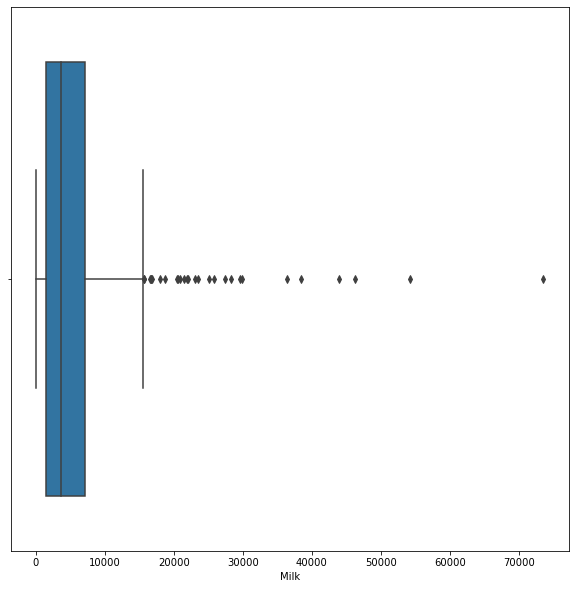

In [105]:
plt.figure(figsize=(10,10))
sns.boxplot(data=wholesale_customer_data, x='Milk')

<AxesSubplot:xlabel='Grocery'>

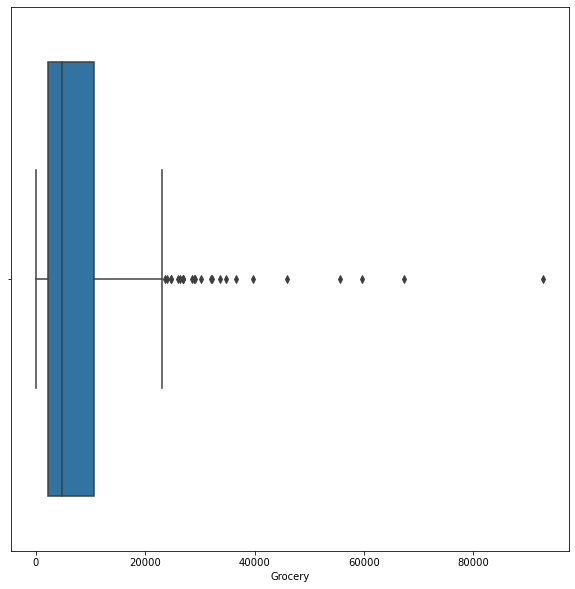

In [106]:
plt.figure(figsize=(10,10))
sns.boxplot(data=wholesale_customer_data, x='Grocery')

<AxesSubplot:xlabel='Frozen'>

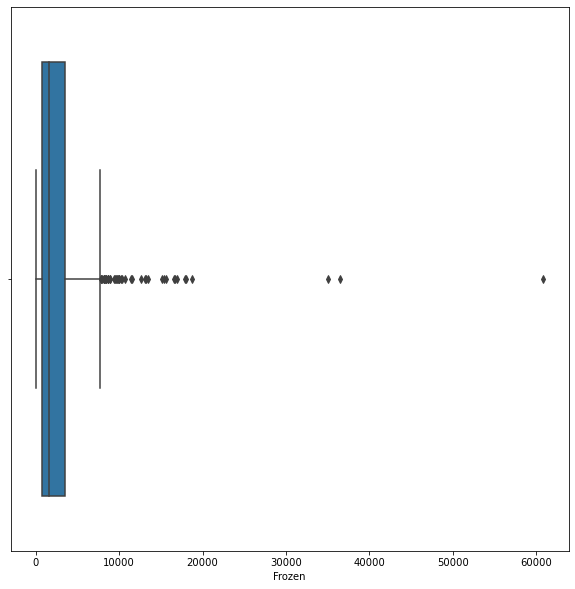

In [107]:
plt.figure(figsize=(10,10))
sns.boxplot(data=wholesale_customer_data, x='Frozen')

<AxesSubplot:xlabel='Detergents_Paper'>

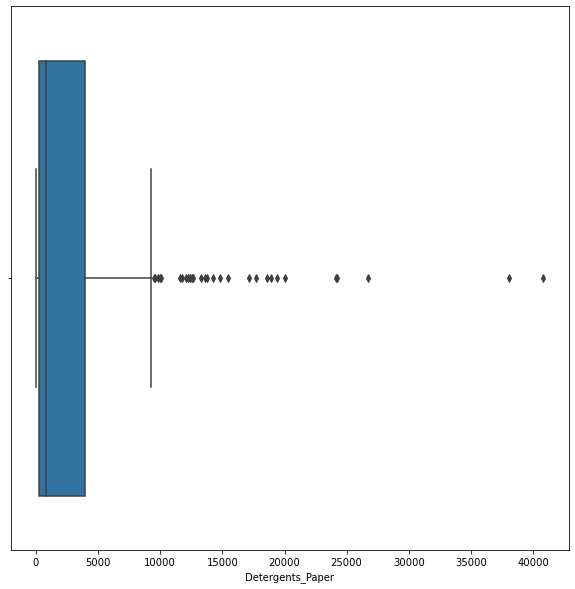

In [108]:
plt.figure(figsize=(10,10))
sns.boxplot(data=wholesale_customer_data, x='Detergents_Paper')

<AxesSubplot:xlabel='Delicassen'>

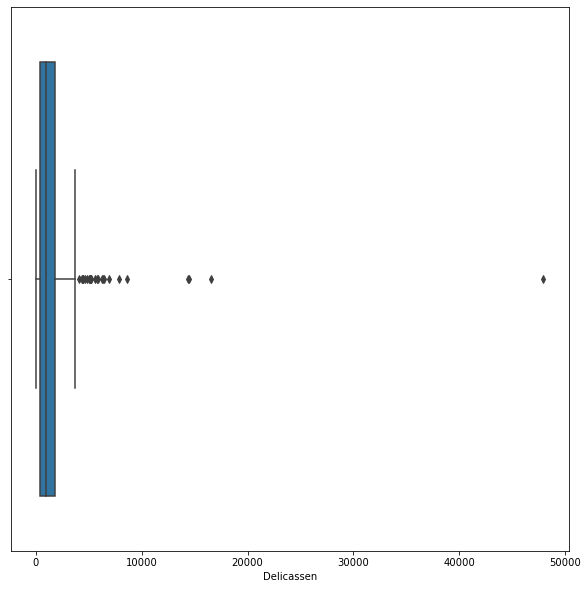

In [109]:
plt.figure(figsize=(10,10))
sns.boxplot(data=wholesale_customer_data, x='Delicassen')

I look through all the graphs and see that "grocery" and "milk" look quite similar and would like to analyze them.

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

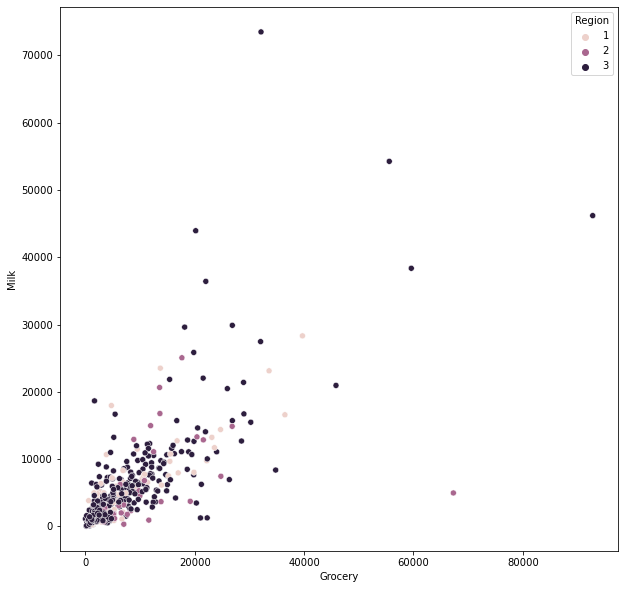

In [110]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=wholesale_customer_data, x='Grocery', y='Milk', hue='Region')

I graph them both in a scatter plot.

Task 2.2

Based on the exploratory analysis I decide that "milk" and "grocery" are very similar and determine that they are suitable for clustering since I observe quite a bit of overlap.

Task 2.3

Creating a dendogram.

In [111]:
scaled_wholesale_customer_data = normalize(wholesale_customer_data)
scaled_wholesale_customer_data = pd.DataFrame(scaled_wholesale_customer_data, columns=wholesale_customer_data.columns)
scaled_wholesale_customer_data[:5]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


I normalize the data so that the model doesn't become biased to the variables of higher magnitude.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [25.0, 25.0, 73.75, 73.75],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [120.0, 120.0, 152.5, 152.5],
  [49.375, 49.375, 136.25, 136.25],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [232.5, 232.5, 262.5, 262.5],
  [202.5, 202.5, 247.5, 247.5],
  [180.0, 180.0, 225.0, 225.0],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0]

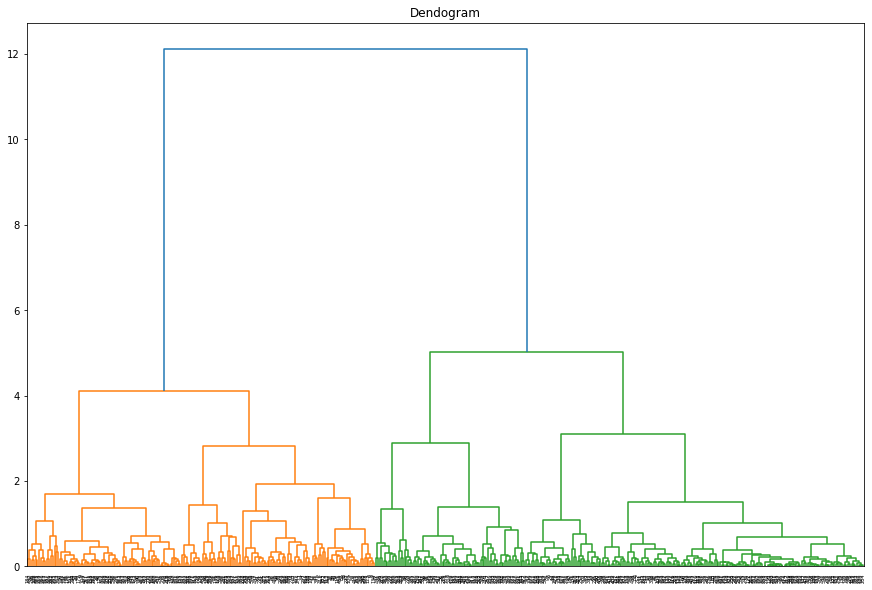

In [112]:
plt.figure(figsize=(15,10))
plt.title("Dendogram")
sch.dendrogram(sch.linkage(scaled_wholesale_customer_data, method='ward'))

Visualizing the dendogram.

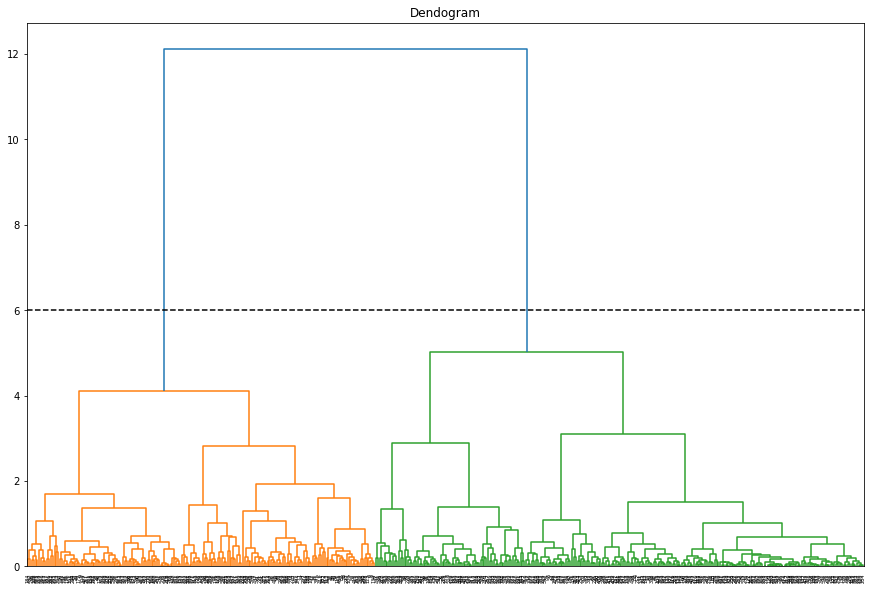

In [113]:
plt.figure(figsize=(15,10))
plt.title("Dendogram")
sch.dendrogram(sch.linkage(scaled_wholesale_customer_data, method='ward'))
plt.axhline(y=6, c='black', linestyle='--')

Cutting the dndeodgram at 6, I did not find a definitive answer to where you should cut a dendogram so I decided to do it in the middle. This gives us 2 clusters since it cuts 2 lines.

In [114]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(scaled_wholesale_customer_data)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Perform the agglomerative clustering using 2 clusters.

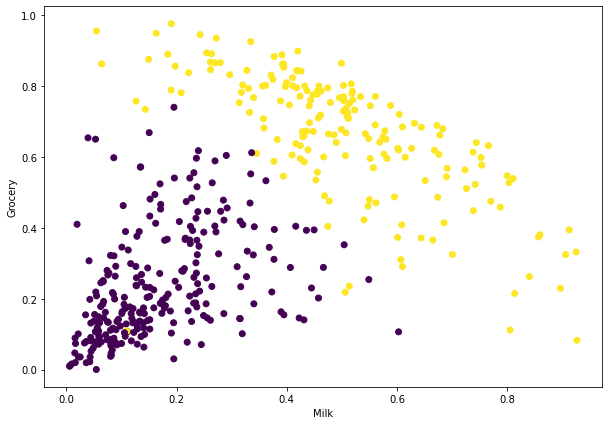

In [115]:
plt.figure(figsize=(10, 7))  
plt.xlabel("Milk")
plt.ylabel("Grocery")
plt.scatter(scaled_wholesale_customer_data['Milk'], scaled_wholesale_customer_data['Grocery'], c=cluster.labels_) 

This is then the visualization of the data. I think it is harder to interpret this data but I suppose generally I would say that.

Purple = Buys less groceries but also way less milk, perhaps this is your average day consumer.

Yellow = Buys a lot more groceries in general but also way more milk, my guess would be that this may be related to businesses such as restaurants and such. It would be interesting to look at since we have the data with which channels each data point comes from.